In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

2017-07-25 10:49:32


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [3]:
from invisible_cities.database import load_db

import invisible_cities.sierpe.blr as blr

import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.reco.peak_functions as pf
import invisible_cities.reco.peak_functions_c as cpf


from   invisible_cities.evm.ic_containers           import S12Params 
from   invisible_cities.evm.ic_containers          import CalibVectors
from   invisible_cities.evm.ic_containers          import DeconvParams
from   invisible_cities.evm.ic_containers          import ThresholdParams
from   invisible_cities.evm.ic_containers          import TriggerParams
from   invisible_cities.core.core_functions  import loc_elem_1d
from   invisible_cities.evm.event_model   import SensorParams
from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.types.ic_types import minmax
import invisible_cities.icaro.mpl_functions as mpl
from invisible_cities.icaro.pmaps_mpl import plot_s12


In [4]:
from invisible_cities.evm.pmaps import S1
from invisible_cities.evm.pmaps import S2
from invisible_cities.evm.pmaps import S2Si

In [5]:
import  invisible_cities.icaro.mpl_functions as mpl
import   invisible_cities.reco.sensor_functions as sf       
from     invisible_cities.reco     import wfm_functions as wfm

In [6]:
from invisible_cities.sierpe   import blr

In [7]:
import invisible_cities.evm.event_model as evm
from invisible_cities.types.ic_types import minmax

In [8]:
from invisible_cities.core.exceptions        import SipmEmptyList
from invisible_cities.core.exceptions        import SipmNotFound
from invisible_cities.core.exceptions        import PeakNotFound

In [9]:
from invisible_cities.sierpe             import fee as FE

In [10]:
from invisible_cities.reco.sensor_functions   import convert_channel_id_to_IC_id

In [12]:
from invisible_cities.icaro.mpl_functions   import draw_pmt_map

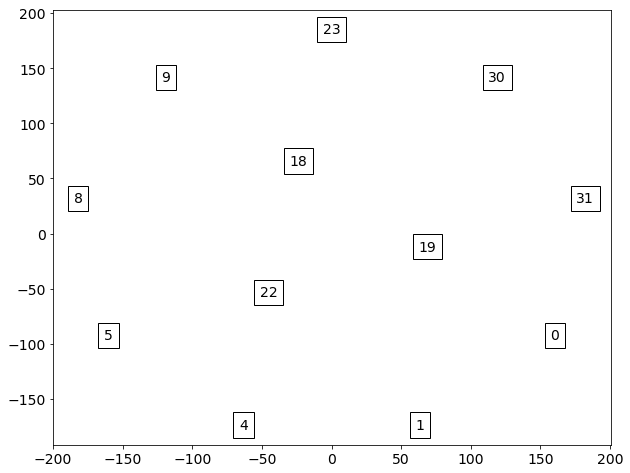

In [13]:
draw_pmt_map(4446)

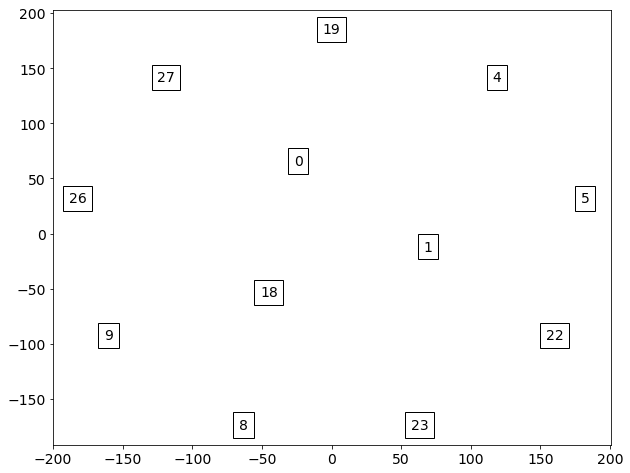

In [14]:
draw_pmt_map(0)

In [15]:
run_number = 0
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
xpmt = DataPMT.X.values
ypmt = DataPMT.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)


In [50]:
DataPMT

,SensorID,ChannelID,PmtID,Active,X,Y,coeff_blr,coeff_c,adc_to_pes,noise_rms,Sigma
0,0,0,PMT1,1,-23.9414,65.7785,0.001632,0.000003,24.3395,0.7060,7.73100
1,1,18,PMT3,1,-44.9951,-53.6231,0.001632,0.000003,24.8580,0.8744,8.82000
2,2,1,PMT2,1,68.9365,-12.1554,0.001611,0.000003,26.2934,0.7213,8.01375
3,3,19,PMT4,1,0.0000,185.0000,0.001599,0.000003,26.4110,0.7624,8.42224
4,4,27,PMTC,1,-118.9160,141.7180,0.001567,0.000003,26.7098,0.7921,6.23125
5,5,26,PMTB,1,-182.1890,32.1249,0.001650,0.000004,22.4456,0.8660,5.65180
6,6,9,PMTA,1,-160.2150,-92.5000,0.001593,0.000003,23.3552,0.7062,7.37840
7,7,8,PMT9,1,-63.2737,-173.8430,0.001612,0.000003,33.8821,0.7278,11.94840
8,8,23,PMT8,1,63.2737,-173.8430,0.001601,0.000003,21.8220,0.7303,6.11073
9,9,22,PMT7,1,160.2150,-92.5000,0.001593,0.000003,25.8020,0.7160,7.46200


In [52]:
run_number = 4538
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values
xpmt = DataPMT.X.values
ypmt = DataPMT.Y.values
pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist()
channel_id = DataPMT.ChannelID.values
coeff_blr = abs(DataPMT.coeff_blr.values)
coeff_c = abs(DataPMT.coeff_c .values)
adc_to_pes = abs(DataPMT.adc_to_pes.values)
adc_to_pes_sipm = abs(DataSiPM.adc_to_pes.values)
DataPMT

,SensorID,ChannelID,PmtID,Active,X,Y,coeff_blr,coeff_c,adc_to_pes,noise_rms,Sigma
0,0,18,PMT1,1,-23.9414,65.7785,0.000788,0.000002,25.023,0.75,10.593
1,1,22,PMT3,1,-44.9951,-53.6231,0.000789,0.000002,26.109,0.78,11.680
2,2,19,PMT2,1,68.9365,-12.1554,0.000775,0.000002,27.741,0.75,10.525
3,3,23,PMT4,1,0.0000,185.0000,0.000778,0.000002,28.359,0.73,10.899
4,4,9,PMTC,1,-118.9160,141.7180,0.000789,0.000002,33.180,0.80,11.838
5,5,8,PMTB,1,-182.1890,32.1249,0.000781,0.000002,24.295,0.78,8.696
6,6,5,PMTA,1,-160.2150,-92.5000,0.000794,0.000002,27.627,0.76,10.326
7,7,4,PMT9,1,-63.2737,-173.8430,0.000773,0.000002,37.206,0.77,14.037
8,8,1,PMT8,1,63.2737,-173.8430,0.000788,0.000002,26.187,0.81,9.270
9,10,31,PMT6,1,182.1890,32.1249,0.000782,0.000002,22.250,0.79,7.941


In [17]:
RWF_file = os.path.join(os.environ['IC_DATA'],
                        'electrons_2500keV_z250_RWF.h5'.format(run_number, run_number))
print('RWF file = {}'.format(RWF_file))

RWF file = /Users/jjgomezcadenas/Projects/ICDATA/electrons_2500keV_z250_RWF.h5


In [18]:
h5rwf = tb.open_file(RWF_file,'r')

In [19]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)
NEVT, pmtrwf, sipmrwf, _ = tbl.get_rwf_vectors(h5rwf)
sp = tbl.get_sensor_params_from_vectors(pmtrwf, sipmrwf)
print(sp)

####################
SensorParams
####################
npmt: 12
pmtwl: 32000
nsipm: 1792
sipmwl: 800



### Reconstruction parameters

In [20]:
calib_vectors = CalibVectors(channel_id = DataPMT.ChannelID.values,
                             coeff_blr = abs(DataPMT.coeff_blr   .values),
                             coeff_c = abs(DataPMT.coeff_c   .values),
                             adc_to_pes = DataPMT.adc_to_pes.values,
                             adc_to_pes_sipm = DataSiPM.adc_to_pes.values,
                             pmt_active = np.nonzero(DataPMT.Active.values)[0].tolist())


deconv_params = DeconvParams(n_baseline = 30000,
                              thr_trigger = 5)

s1par = S12Params(time = minmax(min    = 0 * units.mus,
                           max    = 590 * units.mus),
                           stride = 4,
                           length = minmax(min = 6, max = 20),  #150 ns -- 500 ns
                           rebin  = False)

s2par = S12Params(time = minmax(min    = 101 * units.mus,
                           max    = 799 * units.mus),
                           stride = 40,
                           length = minmax(min = 120, max = 1e5),  # 3 mus --
                           rebin  = True)

thresholds = ThresholdParams(thr_s1=2 * units.pes,
                      thr_s2=1.0 * units.pes,
                      thr_MAU=3*units.adc,
                      thr_sipm=1.5*units.pes,
                      thr_SIPM=15*units.pes)



In [39]:
event=2

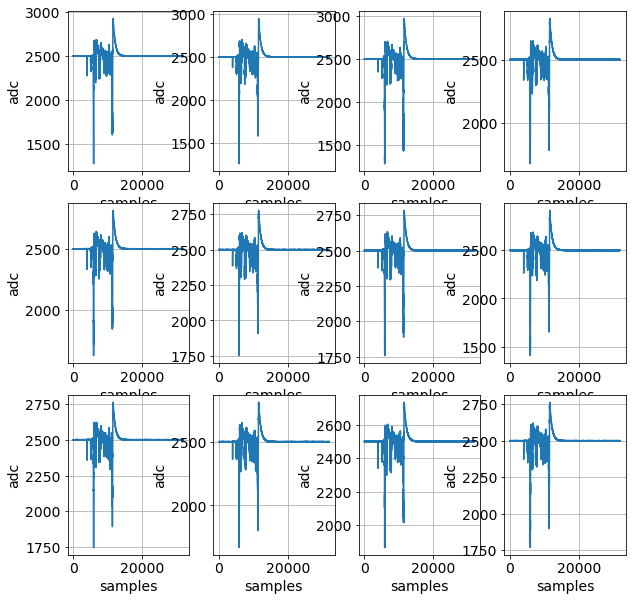

In [40]:
mpl.plot_pmt_waveforms(pmtrwf[event], zoom=False, window_size=1200, figsize=(10,10))

In [41]:
CWF = blr.deconv_pmt(pmtrwf[event], coeff_c, coeff_blr,
                         pmt_active  = pmt_active,
                         n_baseline  = deconv_params.n_baseline,
                         thr_trigger = deconv_params.thr_trigger)

In [42]:
csum, csum_mau = cpf.calibrated_pmt_sum(CWF,
                                            adc_to_pes,
                                            pmt_active  = pmt_active,
                                            n_MAU       = 100,
                                            thr_MAU     = thresholds.thr_MAU)

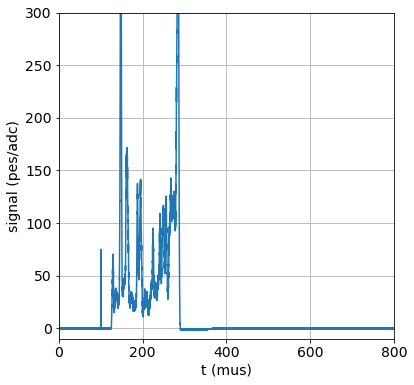

In [43]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 0,
                        t_max      = 799,
                        signal_min =    -10,
                        signal_max =  300,
                        figsize=(6,6))

In [44]:
pmp = pf.compute_pmaps_from_rwf(event, pmtrwf, sipmrwf,
                           s1par, s2par, thresholds,
                           calib_vectors, deconv_params)

In [45]:
pmp.S1

S1 (number of peaks = 1)
peak number = 0: Peak(samples = 13 width =      0.3 mus , energy =    359.1 pes
        height =     75.0 pes tmin-tmax = minmax(min=100.025, max=100.325) mus  

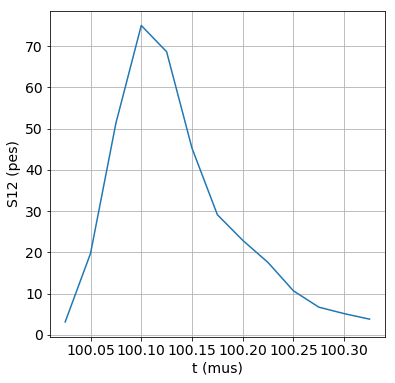

In [47]:
plot_s12(pmp.S1)

In [48]:
pmp.S2

S2 (number of peaks = 1)
peak number = 0: Peak(samples = 165 width =    163.8 mus , energy = 500638.5 pes
        height =  17875.3 pes tmin-tmax = minmax(min=125.5875, max=289.3875) mus  

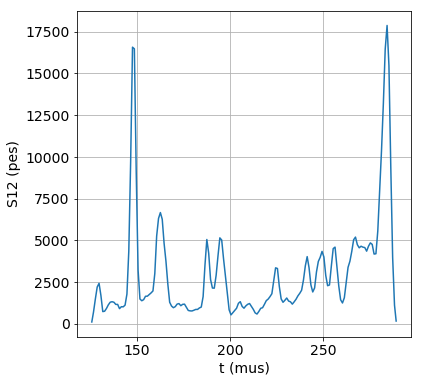

In [49]:
plot_s12(pmp.S2)

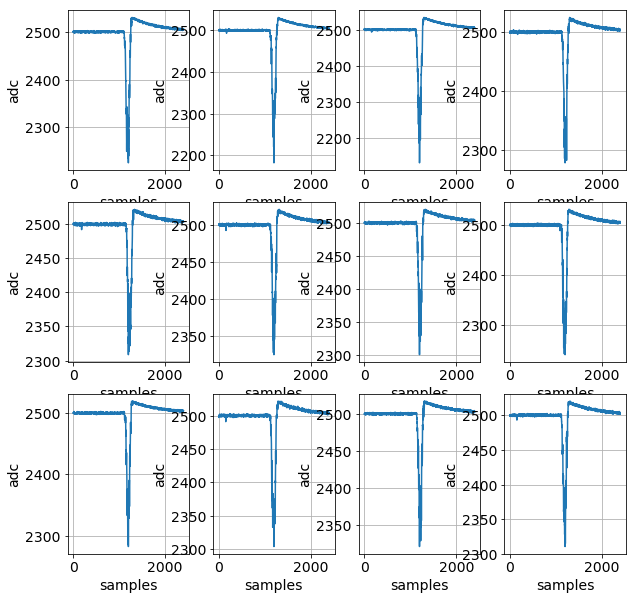

In [147]:
mpl.plot_pmt_waveforms(dataPMT, zoom=True, window_size=1200, figsize=(10,10))

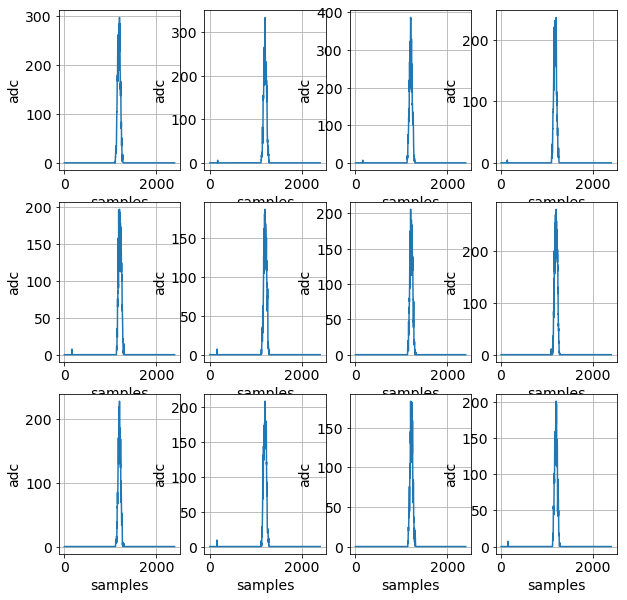

In [148]:
mpl.plot_pmt_waveforms(blrPMT, zoom=True, window_size=1200, figsize=(10,10))

In [149]:
RWF = dataPMT.astype(np.int16)

In [150]:
RWF.dtype

dtype('int16')

In [151]:
BLR = blrPMT

In [152]:
CWF = blr.deconv_pmt(RWF,
                     coeff_c,
                     coeff_blr,
                     pmt_active,
                     n_baseline=28000,
                     thr_trigger=5)

        

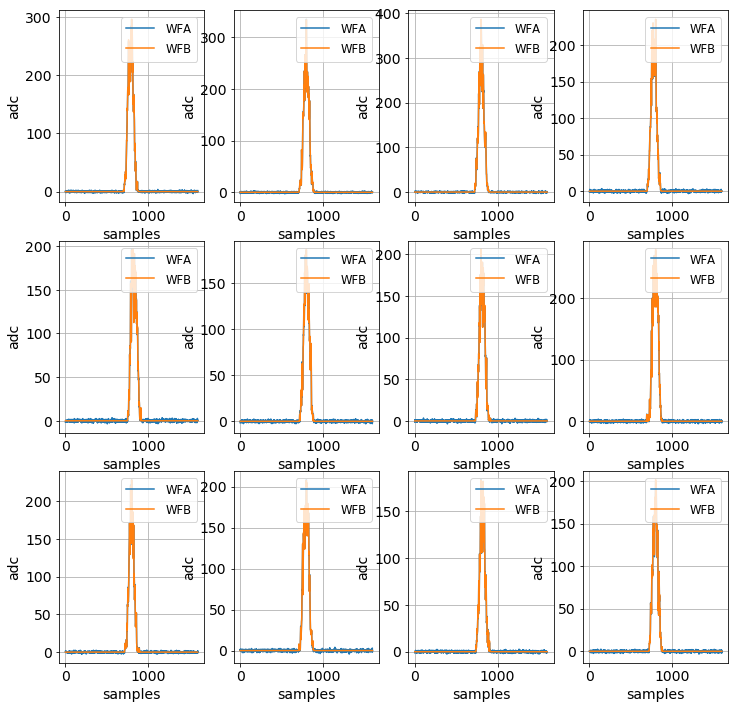

In [153]:
mpl.plot_wfa_wfb(CWF, BLR, zoom=True, window_size=800)

In [154]:
diff = wfm.compare_cwf_blr(cwf = [CWF],
                           pmtblr = [BLR],
                           event_list = [0],
                           window_size = 500)

In [155]:
diff

array([ 0.01169034,  0.01756136,  0.00190146,  0.0238447 ,  0.01580758,
        0.00949771,  0.01816403,  0.01124942,  0.01182631,  0.01300515,
        0.00596171,  0.00387085])

In [156]:
np.sum(diff)

0.14438062561580628

### Emulate trigger

In [183]:
thresholds = ThresholdParams(thr_s1=0.5 * units.pes,
                      thr_s2=1.0 * units.pes,
                      thr_MAU=3*units.adc,
                      thr_sipm=1.5*units.pes,
                      thr_SIPM=15*units.pes)

s2par = S12Params(time = minmax(min    = 101 * units.mus,
                           max    = 799 * units.mus),
                           stride = 40,
                           length = minmax(min = 80, max = 1e5),  # 4 mus --
                           rebin  = True)



In [175]:
csum, csum_mau = cpf.calibrated_pmt_sum(CWF,
                                            adc_to_pes,
                                            pmt_active  = pmt_active,
                                            n_MAU       = 100,
                                            thr_MAU     = thresholds.thr_MAU)

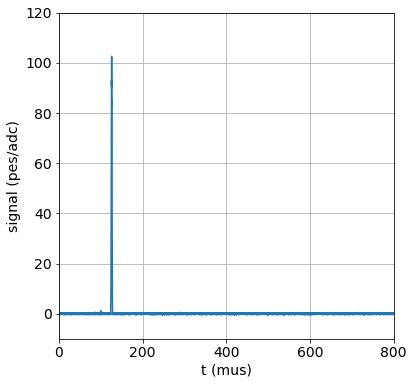

In [177]:
mpl.plot_signal_vs_time_mus(csum,
                        t_min      = 0,
                        t_max      = 800,
                        signal_min =    -10,
                        signal_max =  120,
                        figsize=(6,6))

In [239]:
s2_ene, s2_indx = cpf.wfzs(csum, threshold=thresholds.thr_s2)

In [240]:
s2 = cpf.find_s2(csum, s2_indx, **s2par._asdict())

In [241]:
s2

S2 (number of peaks = 1)
peak number = 0: Peak(samples = 5 width =      3.6 mus , energy =   8012.4 pes
        height =   3609.5 pes tmin-tmax = minmax(min=124.575, max=128.225) mus  

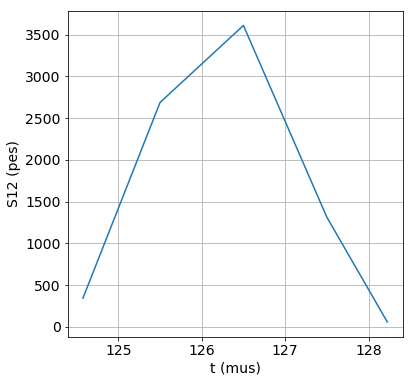

In [242]:
plot_s12(s2)

In [243]:
wfm_ene, wfm_index = cpf.wfzs(CWF[2].astype(np.double),
                                          threshold = min_height)

In [244]:
s2 = cpf.find_s2(CWF[2].astype(np.double),wfm_index, **s2par._asdict())

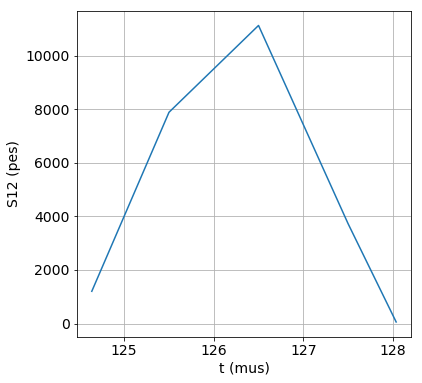

In [245]:
plot_s12(s2)

In [246]:
s2

S2 (number of peaks = 1)
peak number = 0: Peak(samples = 5 width =      3.4 mus , energy =  23993.7 pes
        height =  11122.6 pes tmin-tmax = minmax(min=124.6375, max=128.0375) mus  

In [254]:
# Min/max height of signal in ADC counts per PMT
tr_channels = [0,1]
min_number_channels = 2


min_height =   15 * units.adc
max_height = 20000 * units.adc

# Min/max width in ns
min_width =  3000 * units.ns
max_width = 15000 * units.ns

# Min/max charge in ADC counts per PMT
min_charge =  3000 * units.adc
max_charge = 50000 * units.adc
height = minmax(min = min_height, max = max_height)
charge = minmax(min = min_charge, max = max_charge)
width  = minmax(min = min_width , max = max_width )
data_mc_ratio = 0.8

In [197]:
IC_ids_selection = convert_channel_id_to_IC_id(DataPMT, tr_channels)

In [198]:
IC_ids_selection

array([0, 2])

In [256]:
peak_data = {}  
for pmt_id in IC_ids_selection:        
    wfm_ene, wfm_index = cpf.wfzs(CWF[pmt_id].astype(np.double),
                                          threshold = min_height)
           
    s2 =  cpf.find_s2(CWF[pmt_id].astype(np.double), wfm_index, **s2par._asdict()) 
    peak_data[pmt_id] = s2

In [191]:
peak_data

{0: S2 (number of peaks = 1)
 peak number = 0: Peak(samples = 5 width =      3.5 mus , energy =  21091.7 pes
         height =   9450.8 pes tmin-tmax = minmax(min=124.72500000000001, max=128.175) mus  ,
 2: S2 (number of peaks = 1)
 peak number = 0: Peak(samples = 5 width =      3.4 mus , energy =  23993.7 pes
         height =  11122.6 pes tmin-tmax = minmax(min=124.6375, max=128.0375) mus  }

In [257]:
tp = TriggerParams(trigger_channels    = tr_channels,
                   min_number_channels = min_number_channels,
                             charge              = charge * data_mc_ratio,
                             height              = height * data_mc_ratio,
                             width               = width)

In [258]:

def TriggerFilter(trigger_params):
    """Trigger Filter module"""
    def trigger_filter(peak_data : '{channel_no: s2}'):
        min_charge, max_charge = trigger_params.charge
        min_height, max_height = trigger_params.height
        min_width , max_width  = trigger_params. width
        n_channels_fired = 0
        print(min_width,  max_width)
        print(min_charge,  max_charge)
        print(min_height,  max_height)
        for channel_no, s2 in peak_data.items():
            for peak_number, peak in s2.peaks.items():
                print(peak.width)
                print(peak.total_energy)
                print(peak.height)
                if         min_width  < peak.width        <= max_width:
                    if     min_charge < peak.total_energy <= max_charge:
                        if min_height < peak.height <= max_height:
                            n_channels_fired += 1
                            print(n_channels_fired)
                            if n_channels_fired == trigger_params.min_number_channels:
                                return True
        return False
    return trigger_filter

In [259]:
tf = TriggerFilter(tp)

In [260]:
peak_data

{0: S2 (number of peaks = 1)
 peak number = 0: Peak(samples = 5 width =      3.5 mus , energy =  21091.7 pes
         height =   9450.8 pes tmin-tmax = minmax(min=124.72500000000001, max=128.175) mus  ,
 2: S2 (number of peaks = 1)
 peak number = 0: Peak(samples = 5 width =      3.4 mus , energy =  23993.7 pes
         height =  11122.6 pes tmin-tmax = minmax(min=124.6375, max=128.0375) mus  }

In [261]:
tf(peak_data)

3000.0 15000.0
2400.0 40000.0
12.0 16000.0
3450.0
21091.73440425726
9450.84051585389
1
3400.0
23993.718412111415
11122.575014978112
2


True